In [2]:
# This code will read from the input file, perform sentiment analysis, and write the results to the output file. 

import nltk, csv
import re
from nltk.sentiment import SentimentIntensityAnalyzer

input_file = '../../sources/merged_gutenberg_source_files.txt'
output_file = 'output/merged_gutenberg_sentiment.csv'

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Initialize an empty dictionary to store results
results = {}

# Initialize novel_name to None
novel_name = None

# Define a regex pattern for the novel titles
pattern = re.compile(r'\[(\w+)\]')

# Open the input file
with open(input_file, 'r') as f:
    # Iterate over each line in the file
    for line in f:
        # Remove leading/trailing whitespace
        line = line.strip()
        # If the line is a novel title (matches the regex pattern)
        match = pattern.match(line)
        if match:
            # If a novel has been processed, perform sentiment analysis on its entire text
            if novel_name:
                sentiment = sia.polarity_scores(' '.join(results[novel_name]))
                results[novel_name] = sentiment
            # Extract the new novel name and initialize its results list
            novel_name = match.group(1)
            results[novel_name] = []
        # If the line is part of a novel
        elif novel_name:
            # Add the line to the novel's results list
            results[novel_name].append(line)

# If a novel has been processed, perform sentiment analysis on its entire text
if novel_name:
    sentiment = sia.polarity_scores(' '.join(results[novel_name]))
    results[novel_name] = sentiment

# Open the output file
with open(output_file, 'w', newline='') as f:
    writer = csv.writer(f)
    # Write the headers to the file
    writer.writerow(['novel_name', 'neg', 'neu', 'pos', 'compound'])
    # Iterate over each novel and its results
    for novel_name, sentiment in results.items():
        # Write the novel name and sentiment result to the file
        writer.writerow([novel_name] + list(sentiment.values()))


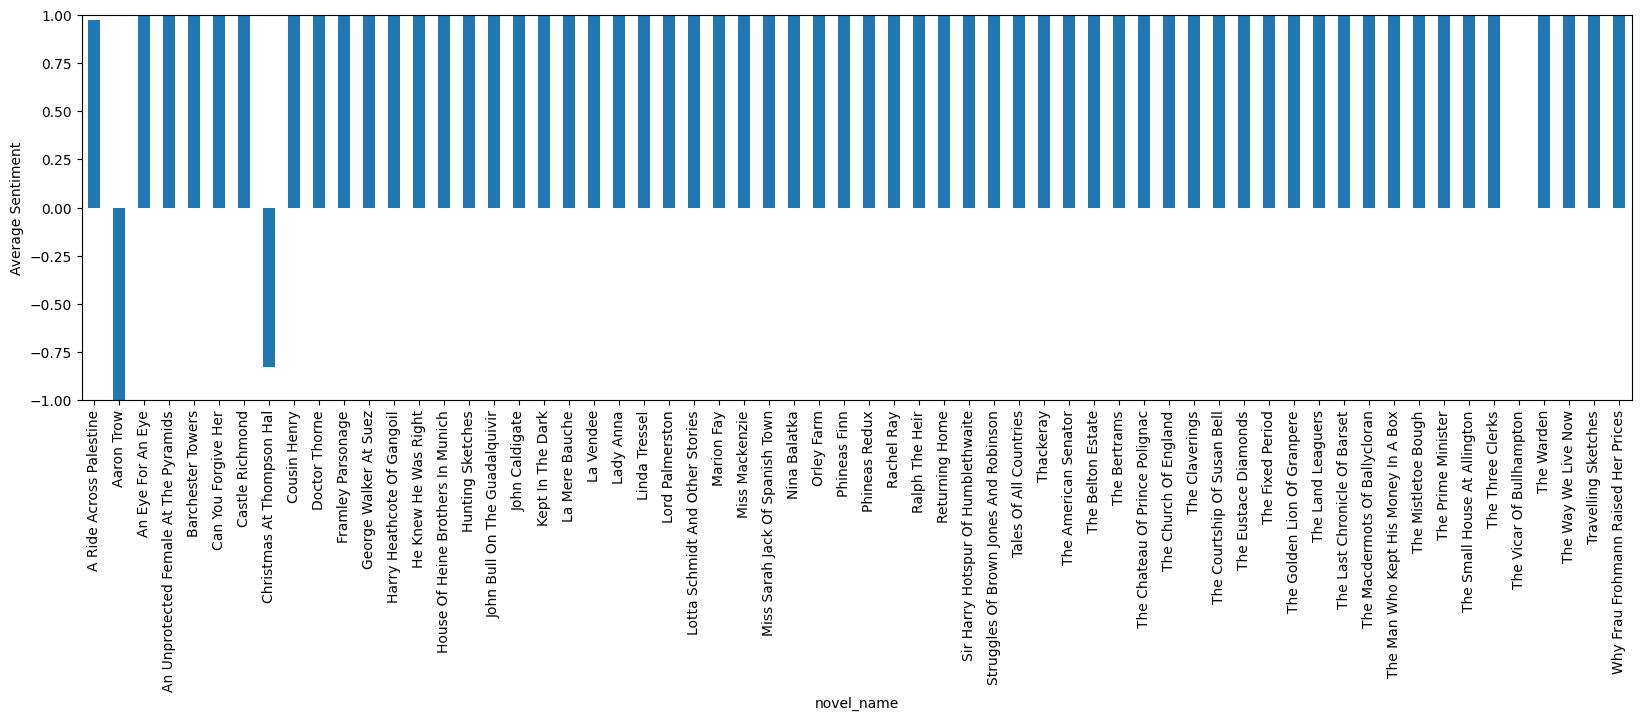

In [4]:
# Convert titles to camel case and plot as a bar graph

import sys
sys.path.append("../..")
import pandas as pd
import matplotlib.pyplot as plt
from modules.gutenberg_text_utils import convert_to_camel_case

# Load the data
df = pd.read_csv(output_file, sep=",")

# Apply the function to the 'novel_name' column
df['novel_name'] = df['novel_name'].apply(convert_to_camel_case)

# Visualise the results

# Convert 'compound' column to numeric
df['compound'] = pd.to_numeric(df['compound'], errors='coerce') 

# Calculate average sentiment
average_sentiment = df.groupby('novel_name')['compound'].mean()

# Plot
plt.figure(figsize=(20,5))  # Increase the width of the figure
average_sentiment.plot(kind='bar')
plt.ylabel('Average Sentiment')
plt.ylim([-1, 1])  # Set the limits of the y-axis
plt.show()